The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, I am  building a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [ ]:
#import all import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
#read training dataset 
train=pd.read_csv('train.csv')
train

# Data Processing & EDA

In [25]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
# check for null values in the data 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are some null values in 'Age', 'Cabin' and 'Embarked'

### Dealing with null values in 'Cabin' column

80% values in 'Cabin' column is null... Deleting Cabin column from the train dataset

In [29]:
train.drop(["Cabin"], axis=1, inplace=True)

In [31]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### Let's deal with null values in Age columns

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

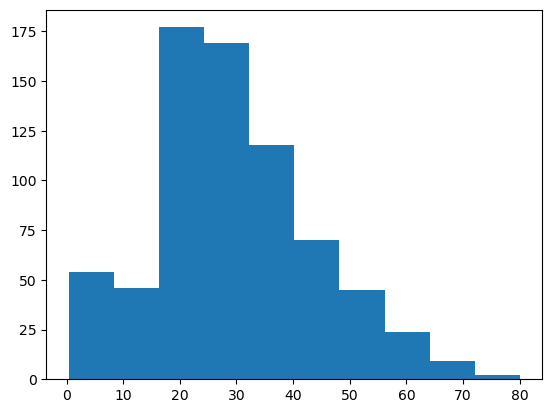

In [35]:
plt.hist(train['Age'])
#plt.hist(x, 5)

In [41]:
print(train['Age'].mode())
print(train['Age'].median())
print(train['Age'].mean())

0    24.0
Name: Age, dtype: float64
28.0
29.69911764705882


In [45]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [48]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

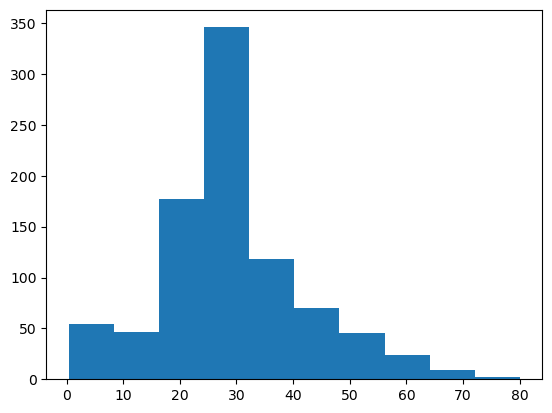

In [49]:
plt.hist(train['Age'])

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

In [52]:
train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [53]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [57]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [213]:
train[train['Fare']==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,male,36.000000,0,0,0.0,S
263,0,1,male,40.000000,0,0,0.0,S
271,1,3,male,25.000000,0,0,0.0,S
277,0,2,male,29.699118,0,0,0.0,S
302,0,3,male,19.000000,0,0,0.0,S
413,0,2,male,29.699118,0,0,0.0,S
466,0,2,male,29.699118,0,0,0.0,S
481,0,2,male,29.699118,0,0,0.0,S
597,0,3,male,49.000000,0,0,0.0,S
633,0,1,male,29.699118,0,0,0.0,S


For some indivuals the Fare is zero, which could mean complimentary ticket or ticket for crew

In [208]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x17214aad0>,
 'caps': [<matplotlib.lines.Line2D at 0x172161e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x172149050>],
 'medians': [<matplotlib.lines.Line2D at 0x172161110>],
 'fliers': [<matplotlib.lines.Line2D at 0x172161990>],
 'means': []}

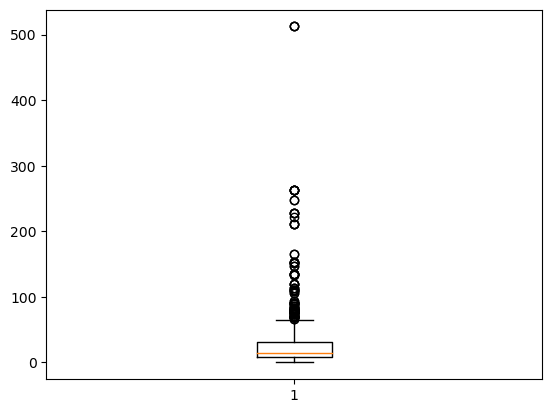

In [56]:
plt.boxplot(train['Fare'])

In [70]:
# drop irrelevant columns 
train.drop(['Name', 'passengerId'],axis=1, inplace=True)

### Check Correalting between columns in the dataset 

In [72]:
train.corr()


/tmp/ipykernel_62101/3330805996.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [103]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [124]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

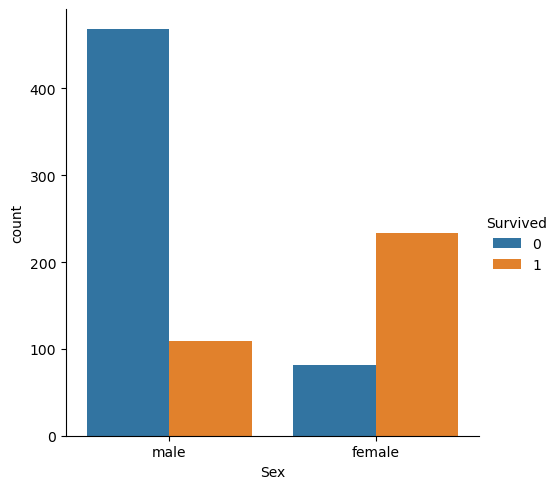

In [114]:
sb.catplot(x='Sex',hue='Survived',data=train,kind="count")

<Axes: xlabel='Sex'>

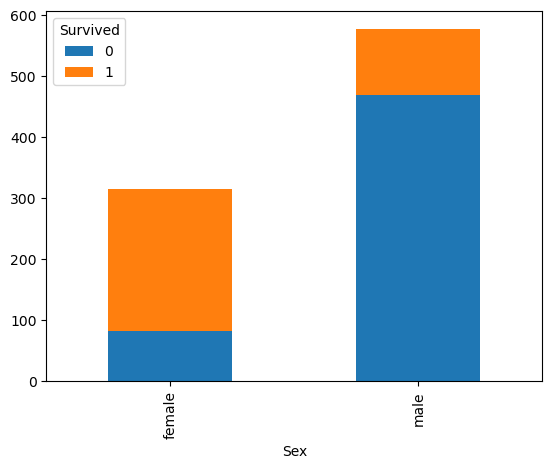

In [110]:
pd.crosstab(train['Sex'],train['Survived']).plot.bar(stacked=True)

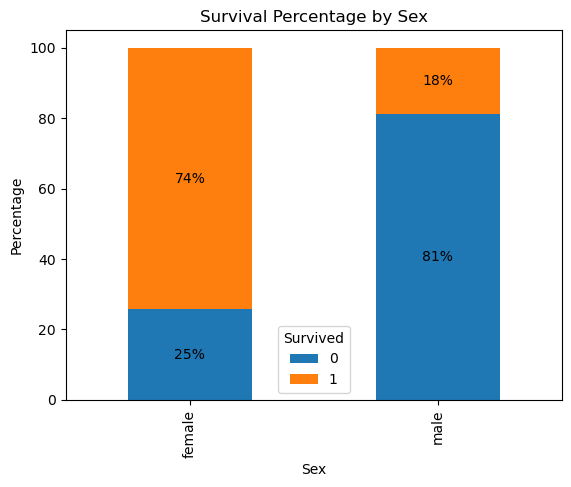

In [121]:
cross_tab = pd.crosstab(train['Sex'], train['Survived'], normalize='index')  # Calculate percentages

# Multiply the percentages by 100 to convert to whole numbers
cross_tab *= 100

# Create a stacked bar plot
ax = cross_tab.plot.bar(stacked=True)

# Add labels to the axes and a title
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Survival Percentage by Sex')

# Add labels for percentage values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d%%', label_type='center')

# Display the plot
plt.show()




Female have higher survival rate then men

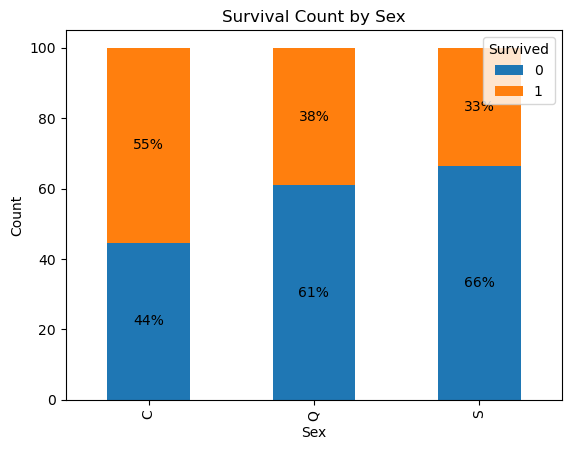

In [123]:
cross_tab = pd.crosstab(train['Embarked'], train['Survived'], normalize='index')

# Multiply the percentages by 100 to convert to whole numbers
cross_tab *= 100

# Create a stacked bar plot
ax = cross_tab.plot.bar(stacked=True)

# Add labels to the axes and a title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Port of Embarkation')

# Add labels for count values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d%%', label_type='center')

# Display the plot
plt.show()

In [125]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

/tmp/ipykernel_62101/668992935.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(train.corr(),annot=True)


<Axes: >

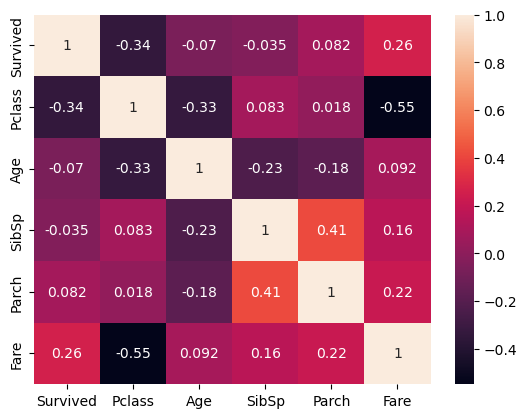

In [126]:
# corelation matrixs
sb.heatmap(train.corr(),annot=True)

Following insigts can be found from the corr matrix:

    1. Passenger class (Pclass) and fare are the two most significant factors influencing survival. 
    2. Higher-class passengers who paid higher fares generally have a better chance of survival. 
    3. Age, the number of siblings/spouses, and the number of parents/children have relatively weak correlations with survival but still provide some insights into the outcomes. 

#### Encoding column 'Sex' and 'Embarked'

In [132]:
# One-hot encoding for 'Sex' and 'Embarked' columns
df = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

# Model Creation

In [161]:
#spliting data into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the validation set
y_pred = clf.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Validation Accuracy: 80.45%


# Make Prediction 

#### Process test Data

In [166]:
# Process test data
test_data = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)
features = X.columns.tolist()
test_data = test_data[features]

In [205]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Since Fare is higly correlated to Class, filling missing values in the Fare column with the median fare of the corresponding passenger class.

In [206]:
test_data[test_data['Fare'].isna()]

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S


In [187]:
median_fares = test_data.groupby('Pclass')['Fare'].median()
test_data['Fare'] = test.apply(lambda row: median_fares[row['Pclass']] if pd.isnull(row['Fare']) else row['Fare'], axis=1)

In [197]:
test_data.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [199]:
# Predict with the model
predictions = clf.predict(test_data)


### Save Output

In [201]:
# Save the preditions with PassengerId to a CSV:
output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
output.to_csv('predictions.csv', index=False)

In [203]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
